# Functions

The basic syntax for a Python function definition is

```
def name(parameter1, parameter2, . . .):
     body
```

Here is simple example:

In [ ]:
def fact(n):
  """Return the factorial of the given number."""            #<- Optional. this is called this docstring, used to document the funciton
  r = 1
  while n > 0:
      r = r * n
      n = n - 1
  return r                    # not all functions return a value




*  docstrings  describe the behavior of a function. Mainly about parameters and functionality. Comments are used for individual blocks or lines.

* The *return* statement is optional.

* If no explicit *return* is executed in the body of the function, the special Python value **None** is returned.    

*  If *return arg* is executed, the value *arg* is immedidately retuned. Nothing else in the function body is executed after a return has been excuted.



In [ ]:
# <functionname>.__doc__     can be used to get the docstring.

fact.__doc__


'Return the factorial of the given number.'

In [3]:
def noReturn():
  print("in function")
  return

print(noReturn()) #this line prints "None" because nothing was returned. Same if there is a return with no args

in function
None


## Function arguments options
1. Positional arguments
2. Keyword arguments
3. Default values
4. Variable numbers of arugments

#### 1. Positional arguments
*  Call the function with input arguments based on the position of the argument variables.

In [ ]:
def power(x, y):
    '''Return x ^ y'''
    return x ** y

# Calling power() using positional arguments
power(3, 2)

9

### 2. Keyword arguments
*  Call the function with input arugments explictly assigned to the argument variable.

In [ ]:
# Calling power() using keyword arguments
power( y=3, x=2)
#order of arguements does not matter since explicitly mentioned .

8

### 3. Default values for arguments
*  Call the function with input arugments explictly assigned to the argument variable.

In [ ]:
def power(x, y=2): # y = 2 by default. for default values it must be specified in the original function
    '''Return x ^ y, default value of y is 2'''
    return x ** y


print(power(x=5, y=3))
#y is 2 is not defined
print(power(x=5))


125
25


### 4. Variable number of arguments
*  Prefixing the final argument name of the function with a * causes all excess non-keyword arguments in a call of a function to be collected together and assigned as a ***TUPLE*** to a given parameter. Here is an example:


In [7]:
def varArg(x, *y):
    '''Example to show variable arguements'''
    print(x)
    print(y)
    print(type(y))

varArg(1)
varArg(1,2)
varArg(1, 2, 3, 4)
varArg.__doc__

1
()
<class 'tuple'>
1
(2,)
<class 'tuple'>
1
(2, 3, 4)
<class 'tuple'>


'Example to show variable arguements'

*  An arbitrary number of keyword arguments can also be handled by having the final argument prefixed with \*\*. It collects all excess *keyword-passed* arguments into a ***DICTIONARY***. Here is an example:

In [8]:
def varArg(x, **y):
    '''Example to show variable arguements'''
    print(x)
    print(y)
    print(type(y))
    print(y.keys())
    print(y.values())
    print("_________")


varArg(x=1)
varArg(1)
varArg(1,z=2)
varArg(1, a=2,b= 3, c=4)

1
{}
<class 'dict'>
dict_keys([])
dict_values([])
_________
1
{}
<class 'dict'>
dict_keys([])
dict_values([])
_________
1
{'z': 2}
<class 'dict'>
dict_keys(['z'])
dict_values([2])
_________
1
{'a': 2, 'b': 3, 'c': 4}
<class 'dict'>
dict_keys(['a', 'b', 'c'])
dict_values([2, 3, 4])
_________


#### Mixed argument-passing techniques
It is possible to use all the argument-passing features of Python functions at the same time with the following rules:

* Positional arguments come first
* then named arguments
* followed by indefinite positional arguments with a single \*
* and last of all the indefinite keyword argument with \*\*



#Mutable objects as arguements

If you pass in a mutable object (such as a list, dictionary, or class instance), any change made to the object changes what the argument is referencing outside the function.



In [ ]:
def f(n, list1, list2):
    print(id(n),id(list1),id(list2))
    list1.append(3)
    list2 = [4, 5, 6] #this reassignment will not show outside method
    n = n + 1
    print(id(n),id(list1),id(list2))

x = 5
y = [1, 2]
z = [4, 5]
#print(id(x),id(y),id(z))
f(x,y,z)


#so the integer changes id since its changed, list1 stays same because somethign is just added, and list 2 changes because it reassigned.

10750984 132314348119232 132314348122624
10751016 132314348119232 132314358662464


Figure from the textbook.

---

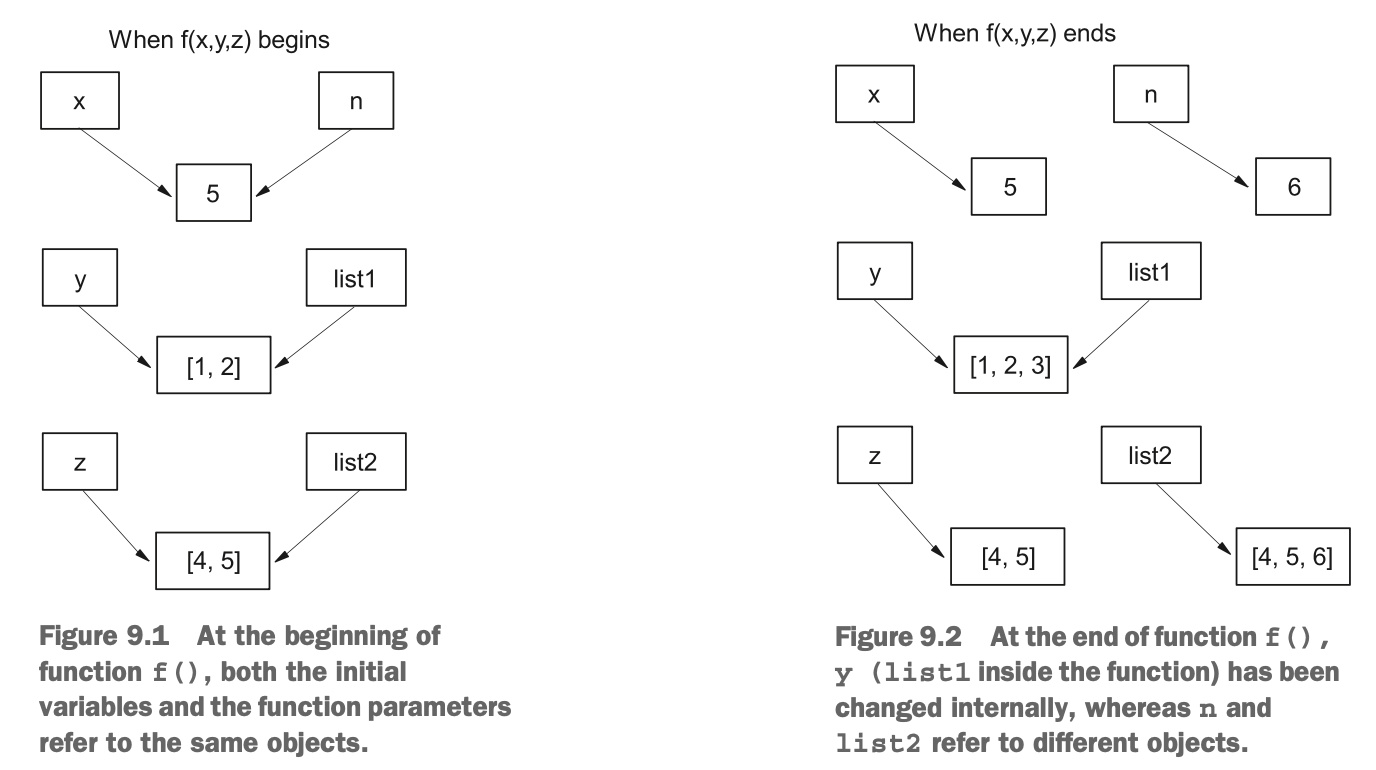

#Side effect of a function

The modification of y above is an example of what is considered a "side effect" of the function.

Any lasting change or observable effect that a function produces outside of its return value is considered a side effect.

It is important to write functions that do not have side effects.

#### Why are side effects bad?
-  If the function has side effects, then we have no way of knowing what the value of x is after the function call without going and looking at the code.

```
x = [1,4,9]
some_function(x)
```
- What is the value of x now?
- Even worse, what we look inside the definition of some_function() and we find that it calls a bunch of other functions.

```
def some_function(input):
    some_other_function(input)
    another_function(input)
    yet_another_function(input)
```


NOTE: We will talk about this again, to discuss PURE FUNCTIONS


# Scope of a variable


Python supports a telescopic approach of scoping. Variables defined outside of functions are accesible within function and nested funcitons.



```global```
 is used to bind local variables to top-level variable

 ```nonlocal```
is used to bind local variable to variable in immediate enclosing scope


Here is an example:

In [ ]:
#work in groups of 2.


#test out various configurations of the variables
#comment and uncomment the variable assignments
#share your understanding with your teammate.


g_var = 0                    #Global variable
nl_var = 0                  #Global variable
print("top level-> g_var: {0} nl_var: {1}".format(g_var, nl_var))

print(id(g_var), id(nl_var))
print("___________________")

def test():
    nl_var = 2              #local inside test()
    print("in test-> g_var: {0} nl_var: {1}".format(g_var, nl_var))
    print(id(g_var), id(nl_var))
    print("___________________")

    def inner_test():       #nested function

        global g_var                             #refers to global var
        nonlocal nl_var #works with this
        print(nl_var, id(nl_var)) #treats nl_var as a new local varibale in the nested func
        nl_var = 4

                                  #D
        g_var = 1
        nl_var = 4
        print(nl_var, id(nl_var))
        print("in inner_test-> g_var: {0} nl_var: {1}".format(g_var,
                                                              nl_var))
        print(id(g_var), id(nl_var))
        print("___________________")

    inner_test()
    print("in test-> g_var: {0} nl_var: {1}".format(g_var, nl_var))



test()
print("top level-> g_var: {0} nl_var: {1}".format(g_var, nl_var))
print(id(g_var), id(nl_var))
print("___________________")


top level-> g_var: 0 nl_var: 0
10750824 10750824
___________________
in test-> g_var: 0 nl_var: 2
10750824 10750888
___________________
2 10750888
4 10750952
in inner_test-> g_var: 1 nl_var: 4
10750856 10750952
___________________
in test-> g_var: 1 nl_var: 4
top level-> g_var: 1 nl_var: 0
10750856 10750824
___________________


## Higher-order functions for functional programming

Takes one or more functions as argument.

Some in-built higher order functions in functions:

* map(function, iterable):
Applies the given function to each item of the iterable and returns a new iterable with the results.

* filter(function, iterable):
Filters the iterable based on the given function, returning a new iterable containing only elements for which the function returns True.

* sorted(iterable, key=function):
Sorts the iterable based on the values returned by the given function.

* reduce(function, iterable):
Applies the given function to the elements of the iterable, reducing them to a single value. (This is in the functools module.)


#Example of map():

In [11]:
# example of map()

def add(a):
  return a.replace("a","B")

stringlist=["and","ant","air","anything"]

result=list(map(add,stringlist))


print(result)
print(id(stringlist))
print(id(result))

['Bnd', 'Bnt', 'Bir', 'Bnything']
138553695058048
138553810715968


map(fucntion u want to apply, object to apply to)

# Lambda

-  A lambda function is a small anonymous function.
-  A lambda function can take any number of arguments,
but can only have one expression.

Here is the syntax of a lambda function:
```
lambda arguments: expression
```
Example:

In [ ]:
x = lambda a : a + 10
print(x(5))

15


In [ ]:
#same example made sleeker through lambda
#no need to name a function and much more manageable in large projects
stringlist=["and","ant","air","anything"]

result=list(map(lambda a:a.replace("a","B"),stringlist)) #essentially applied lambda as the function

print(result)

['Bnd', 'Bnt', 'Bir', 'Bnything']


# Example of filter()
filter(function, iterable):
Filters the iterable based on the given function, returning a new iterable containing only elements for which the function returns True.

In [ ]:
#keep strings with "an" in it.
stringlist=["and","ant","air","anything"]

result=list(filter(lambda a:"an" in a,stringlist))

print(result)

['and', 'ant', 'anything']


#In class activity, teamwork - team of 2.

Write your own code with atleast 1 higher order function.

Given a list of numbers, remove any numbers whose squares are less than 100.



In [14]:

input= [1,4,5,20,15,70,15,6,7,70]

result=list(filter(lambda x: (x**2>=100), input))

print(result)


[20, 15, 70, 15, 70]


# Generator functions

A generator function is a special kind of function that you can use to define your own iterators.

* When you define a generator function, you return each iteration’s value
using the ```yield``` keyword.
* The generator will stop returning values when there are no more iterations, or it encounters either an empty ```return``` statement or the end of the function.
* Local variables in a generator function are saved from one call to the next, unlike in normal function.

# For loops and next() calls can be used to run a generator


Example:

In [ ]:
def testgen():
#important to have a terminating loop.
  i=0
  while i<10:
    yield i
    i+=1

'''
genobj1=testgen()
for x in genobj1:
  print(x)

for x in genobj1:
  print(x)
'''
genobj2=testgen()
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))
print(next(genobj2))




0
1
2
3
4
5
6
7
8
9


# Decorators in Next Class